In [1]:
import sys
import os

# Add the src directory to the Python path
current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.dirname(current_dir)
src_dir = os.path.join(parent_dir, 'src')
sys.path.append(src_dir)

import numpy as np
import matplotlib.pyplot as plt
from preprocessing import train_test_split, load_mnist
from perceptron import Perceptron

# Adjust this path to match your folder structure
data_path = os.path.join(parent_dir, 'data', 'mnist')

# Load all training data
X_all, y_all = load_mnist(data_path, kind='train')

# Normalize the data
X_all = X_all.astype(np.float32) / 255

print(f"All data shape: {X_all.shape}")
print(f"All labels shape: {y_all.shape}")

# Split the data into new training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, seed=2108)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Labels path: /Users/nathan/Desktop/Perceptron/data/mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte
Images path: /Users/nathan/Desktop/Perceptron/data/mnist/train-images-idx3-ubyte/train-images-idx3-ubyte
All data shape: (60000, 784)
All labels shape: (60000,)
Training data shape: (48000, 784)
Test data shape: (12000, 784)


Epoch 0, Loss: 2.2941481320961614
Epoch 10, Loss: 2.1902514315133055
Epoch 20, Loss: 2.095083007317262
Epoch 30, Loss: 2.0071899509002185
Epoch 40, Loss: 1.9257630416782094
Epoch 50, Loss: 1.850257356332539
Epoch 60, Loss: 1.7802338004672917
Epoch 70, Loss: 1.7152971033620994
Epoch 80, Loss: 1.655074232565944
Epoch 90, Loss: 1.599208695195706
Test accuracy on new test set: 0.7715


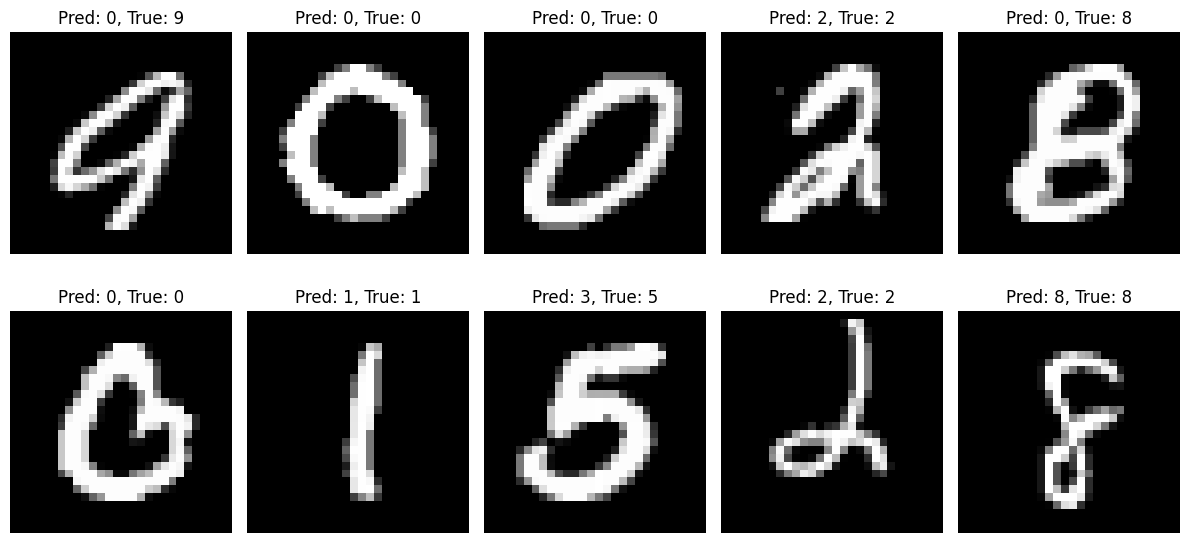

In [2]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, seed=2108)

# Initialize and train the perceptron
input_size = 784  # 28x28 pixels
num_classes = 10  # digits 0-9
perceptron = Perceptron(input_size, num_classes)
perceptron.train(X_train, y_train)

# Evaluate on new test set
predictions = perceptron.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Test accuracy on new test set: {accuracy}")

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predictions[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

Epoch 0, Loss: 2.2977294731076543
Epoch 10, Loss: 2.191416690995241
Epoch 20, Loss: 2.095306498428716
Epoch 30, Loss: 2.007113658499215
Epoch 40, Loss: 1.9256826280789052
Epoch 50, Loss: 1.8503101021787411
Epoch 60, Loss: 1.7804794259143373
Epoch 70, Loss: 1.7157552350465937
Epoch 80, Loss: 1.6557431260362783
Epoch 90, Loss: 1.60007529526416
Test accuracy: 0.7685


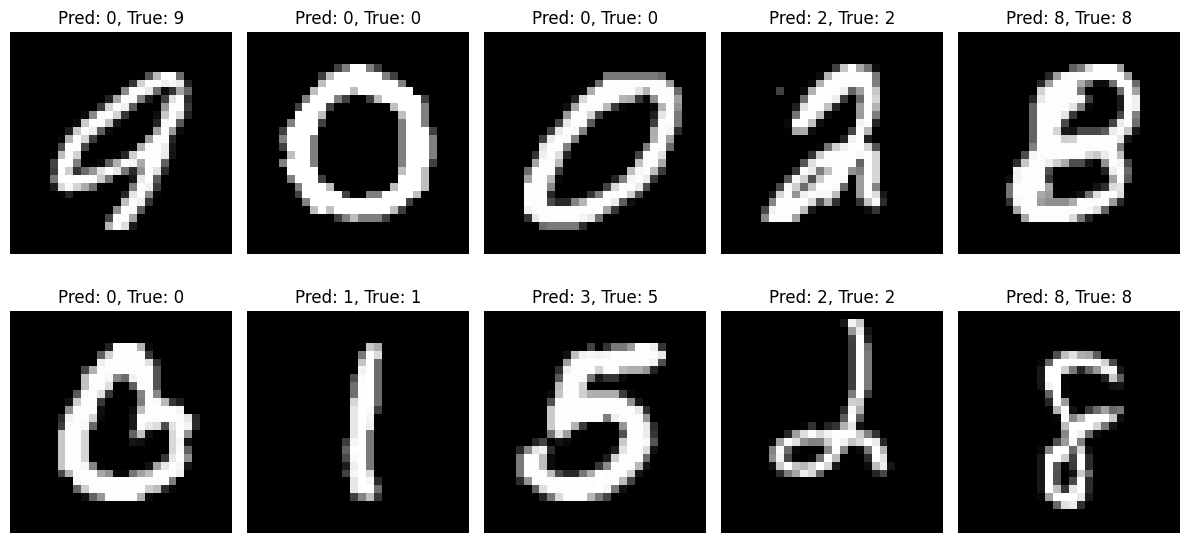

In [3]:
#Experimenting with a larger validation set / smaller training set

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, seed=2108)

# Initialize and train the perceptron
input_size = 784  # 28x28 pixels
num_classes = 10  # digits 0-9
perceptron = Perceptron(input_size, num_classes)
perceptron.train(X_train, y_train)

# Evaluate on test set
predictions = perceptron.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Test accuracy: {accuracy}")

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predictions[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
from cross_validation import cross_validate, print_cv_results

# Perform cross-validation
input_size = 784  # 28x28 pixels
num_classes = 10  # digits 0-9

scores = cross_validate(Perceptron, X_all, y_all, n_splits=5, 
                        input_size=input_size, num_classes=num_classes)


Fold 1/5
Epoch 0, Loss: 2.2805453186686653
Epoch 10, Loss: 2.1789400706733626
Epoch 20, Loss: 2.085183572353195
Epoch 30, Loss: 1.998327674872776
Epoch 40, Loss: 1.9177633433202914
Epoch 50, Loss: 1.843022149483795
Epoch 60, Loss: 1.7736927251985795
Epoch 70, Loss: 1.7093892915376254
Epoch 80, Loss: 1.6497422362066774
Epoch 90, Loss: 1.5943970908262637
Fold 1 score: 0.7728
Fold 2/5
Epoch 0, Loss: 2.307952286829653
Epoch 10, Loss: 2.2033703524448645
Epoch 20, Loss: 2.107752341962361
Epoch 30, Loss: 2.0195051499668843
Epoch 40, Loss: 1.9377575752231777
Epoch 50, Loss: 1.8619351855921313
Epoch 60, Loss: 1.7915858542827061
Epoch 70, Loss: 1.7263106159009005
Epoch 80, Loss: 1.665737967826965
Epoch 90, Loss: 1.6095155278597904
Fold 2 score: 0.7770
Fold 3/5
Epoch 0, Loss: 2.312820805941284
Epoch 10, Loss: 2.2060462560153278
Epoch 20, Loss: 2.109414256469493
Epoch 30, Loss: 2.020609760748549
Epoch 40, Loss: 1.9384924281886378
Epoch 50, Loss: 1.8623843965418012
Epoch 60, Loss: 1.791793722315240

In [5]:
from cross_validation import *
# Print the results
print_cv_results(scores)


Cross-validation results:
Scores: [0.7728333333333334, 0.777, 0.7729166666666667, 0.7708333333333334, 0.7705]
Mean score: 0.7728
Standard deviation: 0.0023
